# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-05 08:00:25.196536


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/4/20


,11/4/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,9485448,233717,2.46
Brazil,5590025,161106,2.88
India,8364086,124315,1.49
Mexico,943630,93228,9.88
United Kingdom,1102305,47832,4.34
Italy,790377,39764,5.03
France,1591152,38728,2.43


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/4/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
50397,US,9291087,2020-11-02,231490.0,491.0,84089.0,83805.857143
50396,US,9206998,2020-11-01,230999.0,401.0,73594.0,81335.714286
50395,US,9133404,2020-10-31,230598.0,908.0,89126.0,79509.000000
50394,US,9044278,2020-10-30,229690.0,1030.0,99321.0,78738.142857
50393,US,8944957,2020-10-29,228660.0,971.0,88521.0,76513.285714
50392,US,8856436,2020-10-28,227689.0,989.0,78358.0,74110.428571
50391,US,8778078,2020-10-27,226700.0,986.0,73632.0,71884.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/4/20


,11/4/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,515815,33556.0,6.51
Texas,959811,18771.0,1.96
California,950920,17808.0,1.87
Florida,821123,16922.0,2.06
New Jersey,245257,16391.0,6.68
Illinois,443803,10216.0,2.30
Massachusetts,163299,10062.0,6.16


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/4/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1725,California,940411,2020-11-02,17689.0,18.0,4533.0,4281.857143
1724,California,935878,2020-11-01,17671.0,12.0,3735.0,4183.142857
1723,California,932143,2020-10-31,17659.0,41.0,4115.0,4065.571429
1722,California,928028,2020-10-30,17618.0,59.0,4380.0,4175.571429
1721,California,923648,2020-10-29,17559.0,30.0,4372.0,4326.285714
1720,California,919276,2020-10-28,17529.0,69.0,4388.0,4619.571429
1719,California,914888,2020-10-27,17460.0,74.0,4450.0,4448.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/4/20


,11/4/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,313526,7117.0,2.27
Orange,60841,1491.0,2.45
Riverside,69827,1329.0,1.90
San Bernardino,66656,1088.0,1.63
San Diego,58106,904.0,1.56
Sacramento,26884,504.0,1.87
San Joaquin,22365,494.0,2.21


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/4/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5469,Los Angeles,310595,2020-11-02,7076.0,2.0,1405.0,1425.857143
5468,Los Angeles,309190,2020-11-01,7074.0,3.0,1572.0,1347.142857
5467,Los Angeles,307618,2020-10-31,7071.0,15.0,1291.0,1240.142857
5466,Los Angeles,306327,2020-10-30,7056.0,12.0,1257.0,1358.000000
5465,Los Angeles,305070,2020-10-29,7044.0,4.0,1701.0,1572.142857
5464,Los Angeles,303369,2020-10-28,7040.0,13.0,1292.0,1840.428571
5463,Los Angeles,302077,2020-10-27,7027.0,27.0,1463.0,1724.000000
5462,Los Angeles,300614,2020-10-26,7000.0,7.0,854.0,1606.857143
5461,Los Angeles,299760,2020-10-25,6993.0,4.0,823.0,1615.571429
5460,Los Angeles,298937,2020-10-24,6989.0,15.0,2116.0,1543.000000



7 day new US cases as of 11/4/20


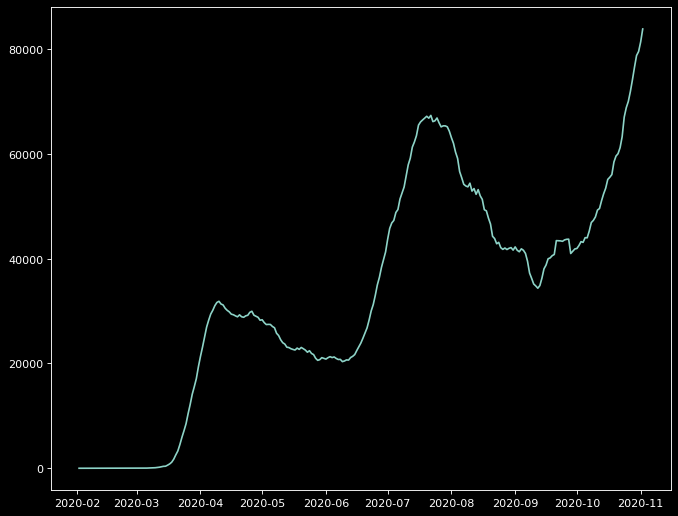

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/4/20


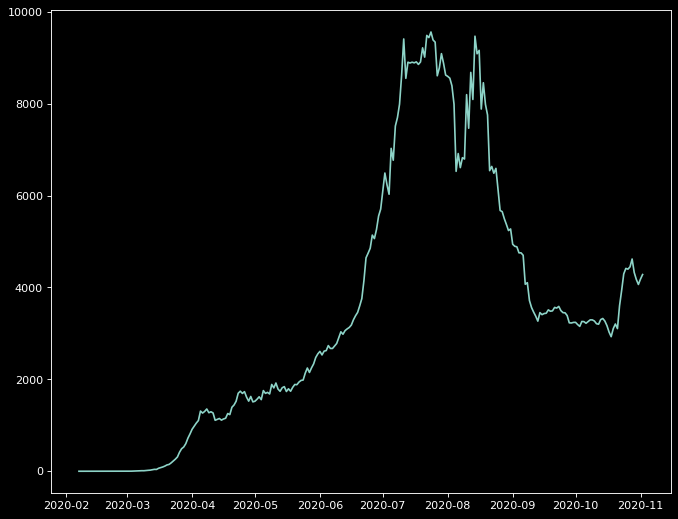

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/4/20


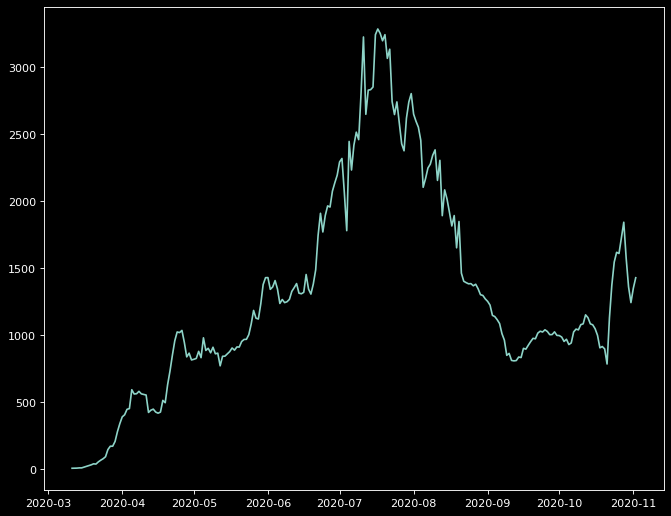

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()